# Lab2- Max Burkhart

In [34]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia340-2025-fall-86358/Crime_Data_from_2020_to_Present.csv') # load the data from s3
df.head(10) #show the top 5 rows

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350
5,240412063,12/11/2024 12:00:00 AM,11/11/2020 12:00:00 AM,1210,4,Hollenbeck,429,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,5300 CRONUS ST,NaN,34.0830,-118.1678
6,240317069,12/16/2024 12:00:00 AM,04/16/2020 12:00:00 AM,1350,3,Southwest,396,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,900 W 40TH PL,NaN,34.0100,-118.2900
7,201115217,10/29/2020 12:00:00 AM,07/07/2020 12:00:00 AM,1400,11,Northeast,1133,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,AO,Adult Other,812.0,860.0,NaN,NaN,3000 ACRESITE ST,NaN,34.1107,-118.2589
8,241708596,04/20/2024 12:00:00 AM,03/02/2020 12:00:00 AM,1200,17,Devonshire,1729,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,17700 SIMONDS ST,NaN,34.2763,-118.5210
9,242113813,12/18/2024 12:00:00 AM,09/01/2020 12:00:00 AM,900,21,Topanga,2196,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,20900 MARMORA ST,NaN,34.1493,-118.5886


In [20]:
df.shape #Shows rows and columns 
df.info() # Gives a summary of the data
df.describe() # Gives summary statistics such as count, mean, and quartiles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004975e+06,327247.000000,1.004980e+06,69160.000000,2314.000000,64.00000,1.004991e+06,1.004991e+06
mean,2.202215e+08,1.339900e+03,1.069174e+01,1.115633e+03,1.400348e+00,5.001568e+02,2.891706e+01,3.056201e+02,363.955300,4.999174e+02,958.101258,984.015990,991.21875,3.399821e+01,-1.180909e+02
std,1.319718e+07,6.510613e+02,6.110255e+00,6.111605e+02,4.899691e-01,2.052731e+02,2.199272e+01,2.193021e+02,123.734528,2.050736e+02,110.354348,52.350982,27.06985,1.610713e+00,5.582386e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,310.000000,821.00000,0.000000e+00,-1.186676e+02
25%,2.106169e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,311.000000,3.310000e+02,998.000000,998.000000,998.00000,3.401470e+01,-1.184305e+02
50%,2.209159e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.00000,3.405890e+01,-1.183225e+02
75%,2.311103e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.00000,3.416490e+01,-1.182739e+02
max,2.521041e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.00000,3.433430e+01,0.000000e+00


#This data has 27 columns and 1,004,991 rows. There are three types of data entries: float64, object, and int64. "float64" are numbers with decimals such as 3.14. "int64" are whole numbers such as 42. "objects" are text such as apple. My first impression is that Los Angeles is crime-ridden city, with over a million recorded crimes in this dataset alone!

In [21]:
df = df.rename(columns={"Crm Cd Desc": "Type of Crime"}) #Renaming Column

In [22]:
df = df.rename(columns={"LOCATION": "Location"}) #Renaming Column

In [18]:
print(df.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Type of Crime', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Location', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


In [6]:
print(df.isnull().sum())

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Type of Crime           0
Mocodes            151619
Vict Age                0
Vict Sex           144644
Vict Descent       144656
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677744
Weapon Desc        677744
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935831
Crm Cd 3          1002677
Crm Cd 4          1004927
Location                0
Cross Street       850755
LAT                     0
LON                     0
dtype: int64


In [7]:
df = df.dropna()
df = df.fillna(0)
df = df.fillna("Unknown")
print(df.isnull().sum())

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Type of Crime     0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
Location          0
Cross Street      0
LAT               0
LON               0
dtype: int64


#I renamed two columns: "Crm Cd Desc" to "Type of Crime", and "LOCATION" to "Location". I removed any rows with missing values and replaced missing numeric values with 0 and any missing text values with the word 'Unknown'.  

In [8]:
print(df['AREA NAME'])

27751        Mission
134755     Hollywood
363765     Hollywood
372524       Rampart
490101     Hollywood
537834    Devonshire
586003       Pacific
728576    Devonshire
809419       Mission
934749       Mission
Name: AREA NAME, dtype: object


In [9]:
df_sorted = df.sort_values(by='AREA NAME')
print(df_sorted)

            DR_NO               Date Rptd                DATE OCC  TIME OCC  \
537834  221718232  12/25/2022 12:00:00 AM  12/25/2022 12:00:00 AM      1150   
728576  231717599  11/15/2023 12:00:00 AM  11/15/2023 12:00:00 AM       400   
134755  200613424  08/02/2020 12:00:00 AM  08/02/2020 12:00:00 AM      2030   
363765  210617136  10/08/2021 12:00:00 AM  10/07/2021 12:00:00 AM      1950   
490101  220600626  04/27/2022 12:00:00 AM  04/23/2022 12:00:00 AM      2300   
27751   201904032  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM      2135   
809419  231915572  10/21/2023 12:00:00 AM  10/21/2023 12:00:00 AM         1   
934749  241905348  02/04/2024 12:00:00 AM  02/03/2024 12:00:00 AM      1100   
586003  221401314  11/10/2022 12:00:00 AM  11/10/2022 12:00:00 AM      2117   
372524  210209196  05/08/2021 12:00:00 AM  05/08/2021 12:00:00 AM       230   

        AREA   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
537834    17  Devonshire         1797         1     122   
728576    17

In [10]:
df_sorted_10 = df_sorted.head(10)
print(df_sorted_10)

            DR_NO               Date Rptd                DATE OCC  TIME OCC  \
537834  221718232  12/25/2022 12:00:00 AM  12/25/2022 12:00:00 AM      1150   
728576  231717599  11/15/2023 12:00:00 AM  11/15/2023 12:00:00 AM       400   
134755  200613424  08/02/2020 12:00:00 AM  08/02/2020 12:00:00 AM      2030   
363765  210617136  10/08/2021 12:00:00 AM  10/07/2021 12:00:00 AM      1950   
490101  220600626  04/27/2022 12:00:00 AM  04/23/2022 12:00:00 AM      2300   
27751   201904032  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM      2135   
809419  231915572  10/21/2023 12:00:00 AM  10/21/2023 12:00:00 AM         1   
934749  241905348  02/04/2024 12:00:00 AM  02/03/2024 12:00:00 AM      1100   
586003  221401314  11/10/2022 12:00:00 AM  11/10/2022 12:00:00 AM      2117   
372524  210209196  05/08/2021 12:00:00 AM  05/08/2021 12:00:00 AM       230   

        AREA   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
537834    17  Devonshire         1797         1     122   
728576    17

In [11]:
df_sorted = df.sort_values(by='AREA NAME')
df_top10 = df_sorted.head(10)
df_adult_arrest = df_top10[df_top10['Status Desc'] == 'Adult Arrest']
print(df_adult_arrest)

            DR_NO               Date Rptd                DATE OCC  TIME OCC  \
537834  221718232  12/25/2022 12:00:00 AM  12/25/2022 12:00:00 AM      1150   
27751   201904032  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM      2135   
809419  231915572  10/21/2023 12:00:00 AM  10/21/2023 12:00:00 AM         1   

        AREA   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd    Type of Crime  ...  \
537834    17  Devonshire         1797         1     122  RAPE, ATTEMPTED  ...   
27751     19     Mission         1924         1     761  BRANDISH WEAPON  ...   
809419    19     Mission         1902         1     210          ROBBERY  ...   

       Status   Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
537834     AA  Adult Arrest    122.0    230.0     910.0    998.0   
27751      AA  Adult Arrest    761.0    930.0     997.0    998.0   
809419     AA  Adult Arrest    210.0    250.0     761.0    998.0   

                               Location                     Cross Street  \
537834  P

#I Selected "AREA NAME". Next, I sorted "AREA NAME" alphabetically, and then I printed the head of "AREA NAME" under the condition those arrested were labeled under "Adult Arrest" 

In [32]:
crime_counts = df.groupby("AREA NAME")["Type of Crime"].value_counts().unstack(fill_value=0)
print(crime_counts)

Type of Crime  ARSON  ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER  \
AREA NAME                                                            
77th Street      203                                            82   
Central          232                                           157   
Devonshire        53                                            15   
Foothill          95                                            52   
Harbor            91                                            26   
Hollenbeck        99                                            61   
Hollywood        128                                            55   
Mission          101                                            38   
N Hollywood      143                                            32   
Newton           181                                            56   
Northeast        129                                            32   
Olympic          142                                            25   
Pacific          126

In [39]:
median_time_by_crime = df.groupby("Crm Cd Desc")["TIME OCC"].median().reset_index()
median_time_by_crime.columns = ["Crm Cd Desc", "Median TIME OCC"]
print(median_time_by_crime)

                                           Crm Cd Desc  Median TIME OCC
0                                                ARSON           1150.0
1         ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER           1655.0
2       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT           1500.0
3                                    ATTEMPTED ROBBERY           1477.5
4                             BATTERY - SIMPLE ASSAULT           1445.0
..                                                 ...              ...
135  VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...           1500.0
136                           VIOLATION OF COURT ORDER           1400.0
137                     VIOLATION OF RESTRAINING ORDER           1430.0
138           VIOLATION OF TEMPORARY RESTRAINING ORDER           1420.0
139                         WEAPONS POSSESSION/BOMBING           1600.0

[140 rows x 2 columns]


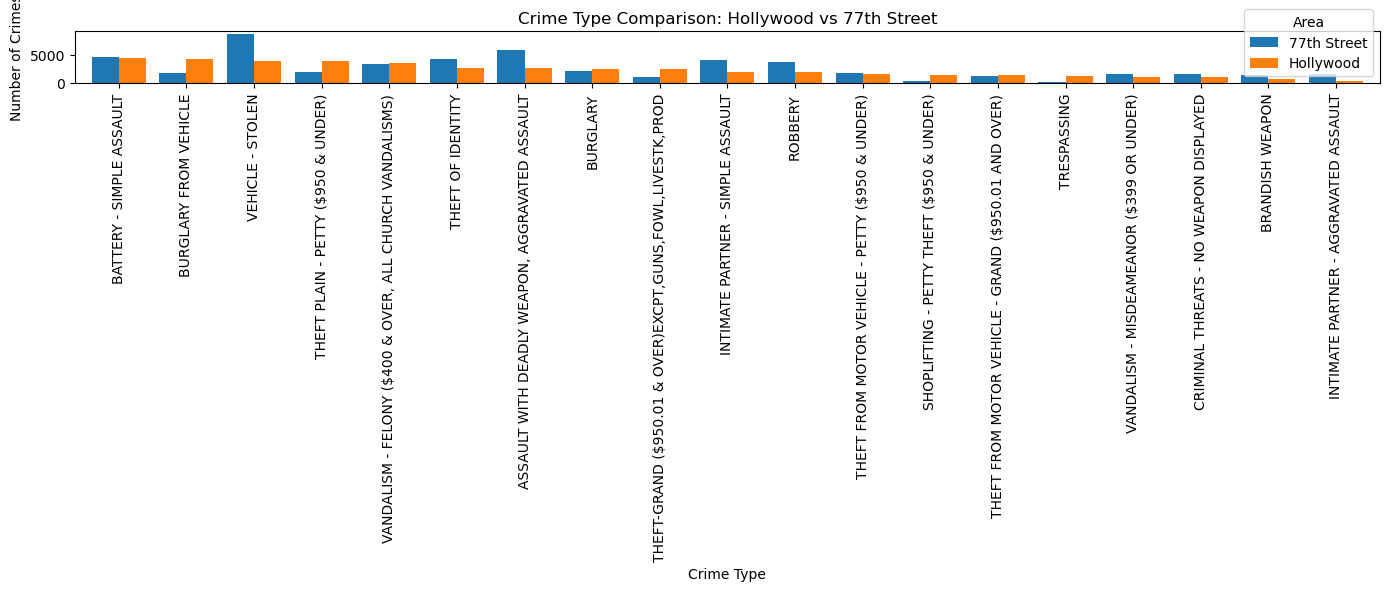

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_df = df[df['AREA NAME'].isin(['Hollywood', '77th Street'])]
crime_counts = filtered_df.groupby(['Crm Cd Desc', 'AREA NAME']).size().unstack(fill_value=0)
crime_counts = crime_counts[crime_counts.sum(axis=1) > 1500]
crime_counts = crime_counts.sort_values(by=['Hollywood', '77th Street'], ascending=False)

crime_counts.plot(kind='bar', figsize=(14, 6), width=0.8)
plt.title('Crime Type Comparison: Hollywood vs 77th Street')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.legend(title='Area')
plt.tight_layout()
plt.show()


#Sorted the data by counting each crime type per Area. According to the data, the Hollywood area was victim to the most "WEAPONS POSSESSION/BOMBING" crimes with 6. Next I sorted the data by the type of crime and the average time those times take place throughout the day. According to the data. The average time for "Arson" to take place (or be reported by a police officer) is about 12:00 PM. 
For the first graph, labelled "Crime Type Comparison: Hollywood vs 77th Steet, I compared crimes in two of the most dangrous areas in Los Angeled (accoriding to the data) and only allowed the crime to be in the graph if it occured over 1,500 times throughout the year. Citizens vehicles are more likely to be stolen on 77th Street, and it looks like vehicle theft is twice as common compared to Hollywood. Citizens, however, are more likely to be the victim of petty theft ($950 and under).

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

assault_df = df[df['Crm Cd Desc'] == 'AGGRAVATED ASSAULT']

assault_counts = assault_df['AREA NAME'].value_counts()

top_areas = assault_counts.head(10)
top_areas.plot(kind='pie', ...)

plt.figure(figsize=(10, 8))
assault_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of AGGRAVATED ASSAULT by Area')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()

SyntaxError: positional argument follows keyword argument (864511327.py, line 9)